# Training Models

## Linear Regression

Equation of Linear Regression model prediction

$ \hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n} $

- y is the predicted value.
- n is the number of features
- $x_{i}$ is the $i^{th}$ feature value
- $\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_{0}$ and the feature weights $\theta_{1},\theta_{2},...,\theta_{n}$)

This can be written much more concisely using a vectorized form:

$\hat{y} = h_{\theta}(x) = \theta · x$ 

- $\theta$ is the model's parameter vector, containing the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ to $\theta_{n}$.
- x is the instance's feature vector, containing $x_{0}$ to $x_{n}$, with $x_{0}$ always equal to 1.
- $\theta . x$ is the dot product of the vectors $\theta$ and $x$, which is of course equal to $\theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$.
- $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$.

To train a Linear Reegression model, we need to find the value of $\theta$ that minimizes the RMSE. In practice, it is simpler to minimize the mean square error (MSE) than the RMSE, and it leads to the same result.

Equation of MSE cost function for a Linear Regression model:

$MSE(X,h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\theta^{T}x^{(i)} - y^{(i)})^{2}$

## The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a mathematical equation that gives the result directly called the Normal Equation:

$\hat{\theta} = (X^{(T)}X)^{-1} X^{T}  y$

In this equation:

- $\theta$ is the value of $\theta$ that minimizes the cost function.
- y is the vector of target values containing $y^{1}$ to $y^{m}$.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

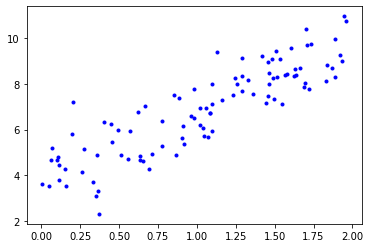

In [20]:
plt.plot(X, y, "b.")
plt.show()

In [13]:
X_b = np.c_[np.ones((100,1)), X] # add Xtheta = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.78041666],
       [2.98439917]])

The function used to generate the data was $y = 4 + 3x_{1} +$ Gaussian noise. In our random set the values that came from theta_best are better because they adapt better in the data with the noise. Now we can make predictions with theta_best:

In [14]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.78041666],
       [9.749215  ]])

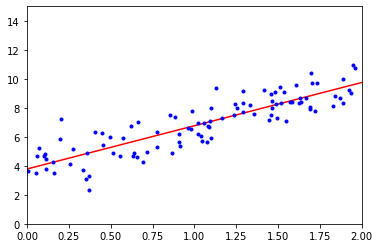

In [16]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.78041666]), array([[2.98439917]]))

In [22]:
lin_reg.predict(X_new)

array([[3.78041666],
       [9.749215  ]])

In [23]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond =1e-6,)
theta_best_svd

array([[3.78041666],
       [2.98439917]])

The function computes $\hat{\theta} = X^{+}y$, where $X^{+}$ is the pseudoinverse of X(specifically, the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly. 

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that descompose the training set matrix into the matrix multiplication of three matrices $U \sum V^{T}$. The approach is more efficient than computing the Normal Equation, plus it handles edge cases.

## Gradient Descent

*Gradient Descent* is generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

You start by filling $\theta$ with random values(this is called *random initialization*). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function(e.g.m the MSE), until the algorithm *converges* to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by the *learning rate* hyperparameter. If it is too small, there is going to be needed a lot of iterations. On the other hand, if it is too high it is possible to not have a convergence.

If the random initialization starts the algorithm on the left, then it will converge to a *local minimum*, which is not as good as the *global minimum*.

When using Gradient Descent, you should ensure that all features have a similar scale(Scikit-Learn's StandardScaler class), or else it will take much longer to converge.

### Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regard to each model parameter $\theta_{j}$. You need to calculate how much the cost functiom is going to change $\theta_{j}$, this is called *partial derivative*.

Equation Partial derivative of the cost function

$\frac{\partial}{\partial \theta_{j}}$ MSE($\theta$)= $\frac{2}{m}\sum_{i=1}^{m} (\theta^{T}x^{(i)} - y^{(i)})x_{j}^{(i)}$

Instead of computing these partial derivative individually, you can use the next equation to compute them all in one go. The gradient vector contains all the partial derivatives of the cost function (one for each model parameter).

Equation gradient vector of the cost function

$\nabla_{\theta}$MSE($\theta$) = $\frac{2}{m}X^{T}(X\theta -y)$

The algortihm is called *Batch Gradient Descent*, because this formula involves calculations over the full training set **X**.As a result it is terribly slow on very large training sets.

In [25]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta*gradients
    
theta

array([[3.78041666],
       [2.98439917]])

To find a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

A simple to soltions to find the number of iterations is to set a very large number of iterations but not interrupt the algorithm when the gradient vector becomes tiny - that is, when its norm becomes smaller than a tiny number $\epsilon$(called the tolerance) - because this happen when Gradient Descent has (almost) reached the minimum. 

### Stochastic Gradient Descent 

The problem of using the Batch Gradient Descent is that it uses the whole training set. At the opposite site, *Stochastic Gradient Descent* picks a random instance in the training set at every step and computes the gradients based only on that single instance. It will be faster for the fact that is less data.

On the other hand, due its stochastic nature, this algortihm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

When the cost function is very irregular, Stochastic Gradient Descent has a better chance to find the global minimum than Batch Gradient Descent.

The function that determines the learning rate at each iteration is called *learning schedule*.

In [26]:
n_epochs = 50
t0, t1 = 5, 50  #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

theta

array([[3.81677789],
       [2.95171209]])

When using SGD, the training instances must be independent and identically distributed to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training, if you don't shuffle the instances then SGD will start by optimizing for one one label, then the next, and so on, and it will not settle close to the global minimum.

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.71753649]), array([2.99446433]))